Welcome! 
We start by loading the dataset.
Note that activity is our label.

People walked around in a 25 m2 apartment for 3 minutes. The tags appear to have micrometer precision 10^-6 and record the location. 

The tag locations where recorded with 1/10 second intervalls each, roughly.


The aim is to create a dataset with synchronized data points.
1. We split our dataset into 1 for each tag
2. We resample each dataset to a matching time
3. We rename the xyz features for each one so that they are belt, chest etc unique
4. We merge them into one dataset
5. What happens to the label? Maybe keep them as unique


ALT 2
1. Merge them unto, lets say chest, and use nearest

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)


# Code below shows number of unique values per feature
'''print('total number of data points: ', data_act.shape)
for title in column_names:
    print(title, data_act[title].unique())'''
    


"print('total number of data points: ', data_act.shape)\nfor title in column_names:\n    print(title, data_act[title].unique())"

In [47]:
# Data cleaning cell

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object 
data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')


#data_act.sort_values(by='date',ascending=False)

# Extract certain parts based on tag (belt, chest etc)
'''data_act = data_act[data_act['tag_identificator'].isin(['belt', 'chest'])] # Removes ankle data
display(data_act)'''

# We can remove certain parts of the data based on label. 
'''display(data_act)
data_act = data_act[data_act['activity'].isin(['walking','sitting','lying', 'sitting on the ground', 'on all fours'])] # Removes ankle data
display(data_act)
data_act = data_act[data_act['activity'].isin(['walking','sitting','lying'])]
display(data_act)
data_act = data_act[data_act['activity'].isin(['walking'])]
display(data_act)'''


"display(data_act)\ndata_act = data_act[data_act['activity'].isin(['walking','sitting','lying', 'sitting on the ground', 'on all fours'])] # Removes ankle data\ndisplay(data_act)\ndata_act = data_act[data_act['activity'].isin(['walking','sitting','lying'])]\ndisplay(data_act)\ndata_act = data_act[data_act['activity'].isin(['walking'])]\ndisplay(data_act)"

In [54]:
# Merging based on method 1

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object and set as identifier (there are a few duplicates)
data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')
data_act.set_index("date", inplace=True)
# data_act[data_act.index.duplicated()] # Show duplicates

# Split into 4 datasets, one for each sensor
data_act = data_act[data_act['sequence_name'].isin(['A01'])]

data_chest = data_act[data_act['tag_identificator'].isin(['chest'])]
data_belt = data_act[data_act['tag_identificator'].isin(['belt'])]

# Resample them

data_chest.asfreq("1S")



,sequence_name,tag_identificator,timestamp,x-coordinate,y-coordinate,z-coordinate,activity
date,,,,,,,
2009-05-27 14:03:25.183,A01,chest,6.337902e+17,4.291954,1.781140,1.344495,walking
2009-05-27 14:03:26.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27 14:03:27.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27 14:03:28.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27 14:03:29.183,A01,chest,6.337902e+17,3.390032,2.030624,1.161410,walking
...,...,...,...,...,...,...,...
2009-05-27 14:06:32.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27 14:06:33.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-27 14:06:34.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Merging based on method 2

# Isolate one sequence
data_act = data_act[data_act['sequence_name'].isin(['A01'])]

# Create two datasets
data_chest = data_act[data_act['tag_identificator'].isin(['chest'])]
data_belt = data_act[data_act['tag_identificator'].isin(['belt'])]

# Rename x, y, z
data_chest.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'chest_x-coordinate', 'chest_y-coordinate', 'chest_z-coordinate', 'chest_activity']
data_belt.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'belt_x-coordinate', 'belt_y-coordinate', 'belt_z-coordinate', 'belt_activity']


display(data_chest)
data_merged = pd.merge_asof(data_chest, data_belt, on='date', 
                        direction='nearest')
display(data_merged)

,sequence_name,tag_identificator,timestamp,date,chest_x-coordinate,chest_y-coordinate,chest_z-coordinate,chest_activity
1,A01,chest,633790226051820913,2009-05-27 14:03:25.183,4.291954,1.781140,1.344495,walking
5,A01,chest,633790226052902087,2009-05-27 14:03:25.290,4.364077,1.767691,1.299996,walking
8,A01,chest,633790226053983265,2009-05-27 14:03:25.397,4.244914,1.981682,1.308759,walking
11,A01,chest,633790226055064446,2009-05-27 14:03:25.507,4.126309,2.165541,1.378844,walking
17,A01,chest,633790226057226795,2009-05-27 14:03:25.723,4.292501,2.073853,1.366508,walking
...,...,...,...,...,...,...,...,...
5815,A01,chest,633790227966027679,2009-05-27 14:06:36.603,3.179572,2.144182,1.287197,walking
5818,A01,chest,633790227967108841,2009-05-27 14:06:36.710,3.075682,1.956137,1.146214,walking
5822,A01,chest,633790227968190020,2009-05-27 14:06:36.820,3.175062,1.957094,1.147795,walking
5825,A01,chest,633790227969271197,2009-05-27 14:06:36.927,3.222214,1.994188,1.090972,walking


,sequence_name_x,tag_identificator_x,timestamp_x,date,chest_x-coordinate,chest_y-coordinate,chest_z-coordinate,chest_activity,sequence_name_y,tag_identificator_y,timestamp_y,belt_x-coordinate,belt_y-coordinate,belt_z-coordinate,belt_activity
0,A01,chest,633790226051820913,2009-05-27 14:03:25.183,4.291954,1.781140,1.344495,walking,A01,belt,633790226052091205,4.359101,1.826456,0.968821,walking
1,A01,chest,633790226052902087,2009-05-27 14:03:25.290,4.364077,1.767691,1.299996,walking,A01,belt,633790226053172379,4.373908,1.887960,0.769019,walking
2,A01,chest,633790226053983265,2009-05-27 14:03:25.397,4.244914,1.981682,1.308759,walking,A01,belt,633790226053172379,4.373908,1.887960,0.769019,walking
3,A01,chest,633790226055064446,2009-05-27 14:03:25.507,4.126309,2.165541,1.378844,walking,A01,belt,633790226055334743,4.418470,1.839860,0.972941,walking
4,A01,chest,633790226057226795,2009-05-27 14:03:25.723,4.292501,2.073853,1.366508,walking,A01,belt,633790226057497087,4.443745,1.882843,0.980792,walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,A01,chest,633790227966027679,2009-05-27 14:06:36.603,3.179572,2.144182,1.287197,walking,A01,belt,633790227966297970,3.031120,2.263461,0.863397,walking
1639,A01,chest,633790227967108841,2009-05-27 14:06:36.710,3.075682,1.956137,1.146214,walking,A01,belt,633790227967379132,2.905829,2.020791,0.823020,walking
1640,A01,chest,633790227968190020,2009-05-27 14:06:36.820,3.175062,1.957094,1.147795,walking,A01,belt,633790227968460311,3.122864,2.325297,0.812613,walking
1641,A01,chest,633790227969271197,2009-05-27 14:06:36.927,3.222214,1.994188,1.090972,walking,A01,belt,633790227969541489,3.325028,2.288264,1.045746,walking


In [37]:
#########################################################################################################
# 1. Load data set and change date and tag name 
#########################################################################################################

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object and set as identifier (there are a few duplicates)
#data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')
#data_act.set_index("date", inplace=True)

#########################################################################################################
# 2. Create 4 separate datasets for each tag and rename xyz coordinates
#########################################################################################################
# Start using only one sequence
data_act = data_act[data_act['sequence_name'].isin(['A03'])]

# Split into 4 datasets, one for each sensor (only 2 at first)
data_chest = data_act[data_act['tag_identificator'].isin(['chest'])]
data_belt = data_act[data_act['tag_identificator'].isin(['belt'])]
data_ar = data_act[data_act['tag_identificator'].isin(['ankle_right'])]
data_al = data_act[data_act['tag_identificator'].isin(['ankle_left'])]

data_chest.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'c_date', 'chest_x-coordinate', 'chest_y-coordinate', 'chest_z-coordinate', 'chest_activity']
data_belt.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'b_date', 'belt_x-coordinate', 'belt_y-coordinate', 'belt_z-coordinate', 'belt_activity']
data_ar.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'ar_date', 'ar_x-coordinate', 'ar_y-coordinate', 'ar_z-coordinate', 'ar_activity']
data_al.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'al_date', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate', 'al_activity']



#########################################################################################################
# 3. Merge each of the 4 onto the original dataset one anfter another and remove original xyz coordinate
#########################################################################################################
#data_merged = pd.merge_asof(data_act, data_chest, on='timestamp')
# We merge each dataset onto the original using timestamp because it is unique (date is NOT unique)
# https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
data_merged = data_act.merge(data_chest, on='timestamp', how='left')
data_merged = data_merged.merge(data_belt, on='timestamp', how='left')
data_merged = data_merged.merge(data_ar, on='timestamp', how='left')
data_merged = data_merged.merge(data_al, on='timestamp', how='left')

#data_merged = data_merged.drop(columns=['sequence_name_y', 'tag_identificator_y', 'sequence_name', 'tag_identificator',
#                'date', 'date_y', 'chest_activity', 'belt_activity', 'ar_activity', 'al_activity', 'c_date', 'b_date', 'ar_date', 'al_date'])
#display(data_merged)

#########################################################################################################
# 4. Use interpolation to fill in the gaps in our data
#########################################################################################################
# https://towardsdatascience.com/every-pandas-function-you-can-should-use-to-manipulate-time-series-711cb0c5c749
#data_act.set_index("date", inplace=True)

#display(data_merged)
list_of_coordinates_axles = ['chest_x-coordinate', 'chest_y-coordinate', 'chest_z-coordinate', 'belt_x-coordinate', 'belt_y-coordinate', 'belt_z-coordinate',
                            'ar_x-coordinate', 'ar_y-coordinate', 'ar_z-coordinate', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate']

# Fills in missing data between data_points using interpolate. The remaing points at the beginning and end of each sequence
# get filled in with ffill and bfill.
for coordinate in list_of_coordinates_axles:
    data_merged[coordinate] = data_merged[coordinate].interpolate()
    data_merged[coordinate] = data_merged[coordinate].ffill()
    data_merged[coordinate] = data_merged[coordinate].bfill()
    



#display(listcol) 

data_merged = data_merged.drop(columns=['x-coordinate', 'y-coordinate', 'z-coordinate', 
                           'tag_identificator_y', 
                          'c_date',  
                          'chest_activity', 'tag_identificator_x', 'b_date', 
                           
                          'belt_activity', 'sequence_name_y', 'tag_identificator_y', 
                          'ar_date',  
                          'ar_activity', 'sequence_name', 'tag_identificator', 'al_date', 
                          'al_activity'])
data_merged.columns = ['sequence_name', 'timestamp', 'date', 'activity', 'chest_x-coordinate', 
                         'chest_y-coordinate', 'chest_z-coordinate', 'sequence_name_x', 'belt_x-coordinate', 
                         'belt_y-coordinate', 'belt_z-coordinate', 'ar_x-coordinate', 'ar_y-coordinate', 
                         'ar_z-coordinate', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate']
data_merged = data_merged.drop(columns=['sequence_name_x'])
display(data_merged)

#s.interpolate(method='pad', limit=2)

#data_merged["linear"] = sample.original.interpolate(method="linear")
#data_merged["nearest"] = sample.original.interpolate(method="nearest")



# NEXT TIME - drop the right columns, make the cod work for all sequences, even when it says that they are not sorted


/var/folders/v7/4g5lx6wn21n67xqv45bcc8p00000gn/T/ipykernel_34690/360048056.py:46: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tag_identificator_x', 'sequence_name_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = data_merged.merge(data_ar, on='timestamp', how='left')


,sequence_name,timestamp,date,activity,chest_x-coordinate,chest_y-coordinate,chest_z-coordinate,belt_x-coordinate,belt_y-coordinate,belt_z-coordinate,ar_x-coordinate,ar_y-coordinate,ar_z-coordinate,al_x-coordinate,al_y-coordinate,al_z-coordinate
0,A03,633790234412102555,27.05.2009 14:17:21:210,walking,4.328097,2.002088,1.324070,4.315547,1.879915,1.210340,4.421340,1.847957,0.406194,4.226767,1.948880,0.504358
1,A03,633790234412372854,27.05.2009 14:17:21:237,walking,4.324138,2.018118,1.324062,4.315547,1.879915,1.210340,4.421340,1.847957,0.406194,4.226767,1.948880,0.504358
2,A03,633790234412643146,27.05.2009 14:17:21:263,walking,4.320178,2.034149,1.324053,4.296889,1.858479,1.172806,4.421340,1.847957,0.406194,4.226767,1.948880,0.504358
3,A03,633790234413183729,27.05.2009 14:17:21:320,walking,4.316218,2.050180,1.324045,4.278231,1.837042,1.135273,4.421340,1.847957,0.406194,4.201280,1.958836,0.529446
4,A03,633790234413454021,27.05.2009 14:17:21:347,walking,4.274100,2.072654,1.319703,4.259573,1.815605,1.097739,4.421340,1.847957,0.406194,4.175794,1.968792,0.554535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,A03,633790236168809877,27.05.2009 14:20:16:880,walking,3.843042,1.808744,1.311978,4.450048,2.130104,1.230467,4.045805,1.933808,0.549836,3.640737,1.751162,0.240666
5322,A03,633790236169080168,27.05.2009 14:20:16:907,walking,3.861013,1.798577,1.313086,4.461610,2.142386,1.221022,4.180480,1.988581,0.692231,3.663544,1.791568,0.205839
5323,A03,633790236169350462,27.05.2009 14:20:16:937,walking,3.878985,1.788411,1.314194,4.473172,2.154668,1.211577,4.180480,1.988581,0.692231,3.686352,1.831974,0.171011
5324,A03,633790236169538570,27.05.2009 14:20:16:953,walking,3.896956,1.778244,1.315302,4.484734,2.166950,1.202132,4.180480,1.988581,0.692231,3.686352,1.831974,0.171011


THE CELL BELOW IS THE ONE THAT I ACTUALLY USE

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


#########################################################################################################
# 1. Load data set and change date and tag name 
#########################################################################################################

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object and set as identifier (there are a few duplicates)
#data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')
#data_act.set_index("date", inplace=True)

def data_merger(data_act, sequence_name):
    '''Takes a dataframe and a sequence name, returns the same dataframe merged and interpolated.'''
    #########################################################################################################
    # 2. Create 4 separate datasets for each tag and rename xyz coordinates
    #########################################################################################################
    # Start using only one sequence
    data_act = data_act[data_act['sequence_name'].isin([sequence_name])]

    # Split into 4 datasets, one for each sensor (only 2 at first)
    data_chest = data_act[data_act['tag_identificator'].isin(['chest'])]
    data_belt = data_act[data_act['tag_identificator'].isin(['belt'])]
    data_ar = data_act[data_act['tag_identificator'].isin(['ankle_right'])]
    data_al = data_act[data_act['tag_identificator'].isin(['ankle_left'])]

    data_chest.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'c_date', 'chest_x-coordinate', 'chest_y-coordinate', 'chest_z-coordinate', 'chest_activity']
    data_belt.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'b_date', 'belt_x-coordinate', 'belt_y-coordinate', 'belt_z-coordinate', 'belt_activity']
    data_ar.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'ar_date', 'ar_x-coordinate', 'ar_y-coordinate', 'ar_z-coordinate', 'ar_activity']
    data_al.columns = ['sequence_name', 'tag_identificator', 'timestamp', 'al_date', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate', 'al_activity']



    #########################################################################################################
    # 3. Merge each of the 4 onto the original dataset one anfter another and remove original xyz coordinate
    #########################################################################################################
    #data_merged = pd.merge_asof(data_act, data_chest, on='timestamp')
    # We merge each dataset onto the original using timestamp because it is unique (date is NOT unique)
    # https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
    data_merged = data_act.merge(data_chest, on='timestamp', how='left')
    data_merged = data_merged.merge(data_belt, on='timestamp', how='left')
    data_merged = data_merged.merge(data_ar, on='timestamp', how='left')
    data_merged = data_merged.merge(data_al, on='timestamp', how='left')

    #data_merged = data_merged.drop(columns=['sequence_name_y', 'tag_identificator_y', 'sequence_name', 'tag_identificator',
    #                'date', 'date_y', 'chest_activity', 'belt_activity', 'ar_activity', 'al_activity', 'c_date', 'b_date', 'ar_date', 'al_date'])
    #display(data_merged)

    #########################################################################################################
    # 4. Use interpolation to fill in the gaps in our data
    #########################################################################################################
    # https://towardsdatascience.com/every-pandas-function-you-can-should-use-to-manipulate-time-series-711cb0c5c749
    #data_act.set_index("date", inplace=True)

    #display(data_merged)
    list_of_coordinates_axles = ['chest_x-coordinate', 'chest_y-coordinate', 'chest_z-coordinate', 'belt_x-coordinate', 'belt_y-coordinate', 'belt_z-coordinate',
                                'ar_x-coordinate', 'ar_y-coordinate', 'ar_z-coordinate', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate']
    # Fills in missing data between data_points using interpolate. The remaing points at the beginning and end of each sequence
    # get filled in with ffill and bfill.
    for coordinate in list_of_coordinates_axles:
        data_merged[coordinate] = data_merged[coordinate].interpolate()
        data_merged[coordinate] = data_merged[coordinate].ffill()
        data_merged[coordinate] = data_merged[coordinate].bfill()

    data_merged = data_merged.drop(columns=['x-coordinate', 'y-coordinate', 'z-coordinate', 
                               'tag_identificator_y', 
                              'c_date',  
                              'chest_activity', 'tag_identificator_x', 'b_date', 

                              'belt_activity', 'sequence_name_y', 'tag_identificator_y', 
                              'ar_date',  
                              'ar_activity', 'sequence_name', 'tag_identificator', 'al_date', 
                              'al_activity'])
    data_merged.columns = ['sequence_name', 'timestamp', 'date', 'activity', 'chest_x-coordinate', 
                             'chest_y-coordinate', 'chest_z-coordinate', 'sequence_name_x', 'belt_x-coordinate', 
                             'belt_y-coordinate', 'belt_z-coordinate', 'ar_x-coordinate', 'ar_y-coordinate', 
                             'ar_z-coordinate', 'al_x-coordinate', 'al_y-coordinate', 'al_z-coordinate']
    data_merged = data_merged.drop(columns=['sequence_name_x'])

    return data_merged

list_of_datasequences = data_act['sequence_name'].unique()
list_of_dataframes = []

# We convert dataframes into merged dataframes, one sequence at a time (we don't want to interpolate using datapoints
# from other sequences).

for sequence in list_of_datasequences:
    list_of_dataframes.append(data_merger(data_act, sequence))

counter = 0
# This adds them all together into one dataframe
merged_data_act = list_of_dataframes[0]
for sequence in range(len(list_of_datasequences)):
    if counter == 0:
        counter = 1
    else:
        merged_data_act = pd.concat([merged_data_act, list_of_dataframes[sequence]])
        
# We rename the row_labels since they are no longer unique (they were names for each sequence so there are 25
# '1' etc.)
merged_data_act = merged_data_act.rename(index = lambda x: x)
display(merged_data_act)

merged_data_act.to_csv('merged_data_NEWer.csv', index=False)

/var/folders/v7/4g5lx6wn21n67xqv45bcc8p00000gn/T/ipykernel_34690/3345869180.py:53: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tag_identificator_x', 'sequence_name_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = data_merged.merge(data_ar, on='timestamp', how='left')
/var/folders/v7/4g5lx6wn21n67xqv45bcc8p00000gn/T/ipykernel_34690/3345869180.py:53: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tag_identificator_x', 'sequence_name_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = data_merged.merge(data_ar, on='timestamp', how='left')
/var/folders/v7/4g5lx6wn21n67xqv45bcc8p00000gn/T/ipykernel_34690/3345869180.py:53: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tag_identificator_x', 'sequence_name_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = data_merged.merge(data_ar, on='timestamp'

,sequence_name,timestamp,date,activity,chest_x-coordinate,chest_y-coordinate,chest_z-coordinate,belt_x-coordinate,belt_y-coordinate,belt_z-coordinate,ar_x-coordinate,ar_y-coordinate,ar_z-coordinate,al_x-coordinate,al_y-coordinate,al_z-coordinate
0,A01,633790226051280329,27.05.2009 14:03:25:127,walking,4.291954,1.781140,1.344495,4.359101,1.826456,0.968821,4.324462,2.072460,0.488065,4.062931,1.892434,0.507425
1,A01,633790226051820913,27.05.2009 14:03:25:183,walking,4.291954,1.781140,1.344495,4.359101,1.826456,0.968821,4.324462,2.072460,0.488065,4.071232,1.888289,0.493945
2,A01,633790226052091205,27.05.2009 14:03:25:210,walking,4.309984,1.777778,1.333371,4.359101,1.826456,0.968821,4.324462,2.072460,0.488065,4.079534,1.884144,0.480464
3,A01,633790226052361498,27.05.2009 14:03:25:237,walking,4.328015,1.774416,1.322246,4.362803,1.841832,0.918870,4.324462,2.072460,0.488065,4.087835,1.879999,0.466983
4,A01,633790226052631792,27.05.2009 14:03:25:263,walking,4.346046,1.771054,1.311121,4.366505,1.857208,0.868920,4.324462,2.072460,0.488065,4.055501,1.835890,0.477998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,E05,633790146419554374,27.05.2009 11:50:41:957,walking,3.140489,1.936017,1.423725,3.359577,2.027247,1.070798,3.209474,2.044571,0.062902,3.351634,1.988035,0.393693
8889,E05,633790146419824669,27.05.2009 11:50:41:983,walking,3.164692,1.925867,1.388406,3.359577,2.027247,1.070798,3.189705,2.006769,0.060280,3.386878,2.004729,0.395161
8890,E05,633790146420094965,27.05.2009 11:50:42:010,walking,3.188895,1.915717,1.353087,3.359577,2.027247,1.070798,3.169937,1.968966,0.057659,3.327917,1.983011,0.385033
8891,E05,633790146420635550,27.05.2009 11:50:42:063,walking,3.188895,1.915717,1.353087,3.359577,2.027247,1.070798,3.150169,1.931164,0.055037,3.268955,1.961294,0.374905


The code below briefly visualizes the data

,sequence_name,timestamp,date,activity,chest_x-coordinate,chest_y-coordinate,chest_z-coordinate,belt_x-coordinate,belt_y-coordinate,belt_z-coordinate,ar_x-coordinate,ar_y-coordinate,ar_z-coordinate,al_x-coordinate,al_y-coordinate,al_z-coordinate
0,A01,633790226051280329,27.05.2009 14:03:25:127,walking,4.291954,1.781140,1.344495,4.359101,1.826456,0.968821,4.324462,2.072460,0.488065,4.062931,1.892434,0.507425
1,A01,633790226051820913,27.05.2009 14:03:25:183,walking,4.291954,1.781140,1.344495,4.359101,1.826456,0.968821,4.324462,2.072460,0.488065,4.071232,1.888289,0.493945
2,A01,633790226052091205,27.05.2009 14:03:25:210,walking,4.309984,1.777778,1.333371,4.359101,1.826456,0.968821,4.324462,2.072460,0.488065,4.079534,1.884144,0.480464
3,A01,633790226052361498,27.05.2009 14:03:25:237,walking,4.328015,1.774416,1.322246,4.362803,1.841832,0.918870,4.324462,2.072460,0.488065,4.087835,1.879999,0.466983
4,A01,633790226052631792,27.05.2009 14:03:25:263,walking,4.346046,1.771054,1.311121,4.366505,1.857208,0.868920,4.324462,2.072460,0.488065,4.055501,1.835890,0.477998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164855,E05,633790146419554374,27.05.2009 11:50:41:957,walking,3.140489,1.936017,1.423725,3.359577,2.027247,1.070798,3.209474,2.044571,0.062902,3.351634,1.988035,0.393693
164856,E05,633790146419824669,27.05.2009 11:50:41:983,walking,3.164692,1.925867,1.388406,3.359577,2.027247,1.070798,3.189705,2.006769,0.060280,3.386878,2.004729,0.395161
164857,E05,633790146420094965,27.05.2009 11:50:42:010,walking,3.188895,1.915717,1.353087,3.359577,2.027247,1.070798,3.169937,1.968966,0.057659,3.327917,1.983011,0.385033
164858,E05,633790146420635550,27.05.2009 11:50:42:063,walking,3.188895,1.915717,1.353087,3.359577,2.027247,1.070798,3.150169,1.931164,0.055037,3.268955,1.961294,0.374905


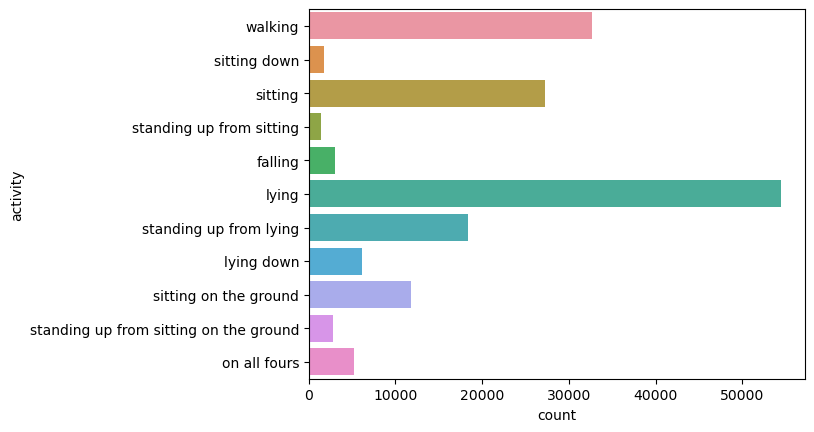

"for sequence in data_test['sequence_name'].unique():\n    data_act_current = data_test[data_test['sequence_name'].isin([sequence])]\n    plt.bar(data_act_current['tag_identificator'].unique(), data_act_current['tag_identificator'].value_counts())\n    #plt.pie(data_act_current['tag_identificator'].value_counts(), labels=data_act_current['tag_identificator'].unique(), radius=0.3)\n    plt.title(sequence)\n    plt.show()"

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


# Read the file
data_test = pd.read_csv('merged_data_NEWer.csv',sep=',',header=0)
display(data_test)

# Show distribution of labels
import seaborn as sns

sns.countplot(y="activity",data=data_test)
plt.show()

